In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import warnings
import json
from datetime import datetime

In [4]:
pd.read_parquet('data/sample_M_Y_IH_IF.parquet')

,timestamp,symbol,open,high,low,close,volume,open_interest,settlement_price,turnover
0,2024-01-01 09:30:00,IH2406,2502.74,2504.28,2500.80,2500.80,3645,100092,2499.37,2.734621e+09
1,2024-01-01 09:30:00,IF2406,3804.16,3806.51,3801.21,3801.21,3645,100092,3799.04,4.156623e+09
2,2024-01-01 09:31:00,IH2406,2502.57,2505.98,2497.70,2500.26,3645,99942,2501.11,2.734039e+09
3,2024-01-01 09:31:00,IF2406,3803.91,3809.09,3796.50,3800.40,3645,99942,3801.69,4.155739e+09
4,2024-01-01 09:32:00,IH2406,2506.34,2509.85,2503.37,2505.94,3644,99993,2506.41,2.739497e+09
...,...,...,...,...,...,...,...,...,...,...
31195,2024-03-29 14:57:00,IH2406,13328.45,13352.18,13303.21,13309.35,3089,138221,13307.24,1.233378e+10
31196,2024-03-29 14:58:00,IF2406,20306.16,20342.54,20286.17,20311.15,3084,137376,20325.85,1.879187e+10
31197,2024-03-29 14:58:00,IH2406,13359.32,13383.25,13346.16,13362.60,3084,137376,13372.27,1.236308e+10
31198,2024-03-29 14:59:00,IH2406,13321.72,13333.95,13306.67,13319.41,3079,136898,13315.33,1.230314e+10


In [ ]:
# !pip install dolphindb
import dolphindb as ddb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 2.4 MB/s eta 0:00:00a 0:00:01m


In [18]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ss = ddb.session()
ss.connect("localhost", 8848, "admin", "123456")

True

In [5]:
df = ss.run("select * from bband_value_stream")

<Axes: xlabel='datetime'>

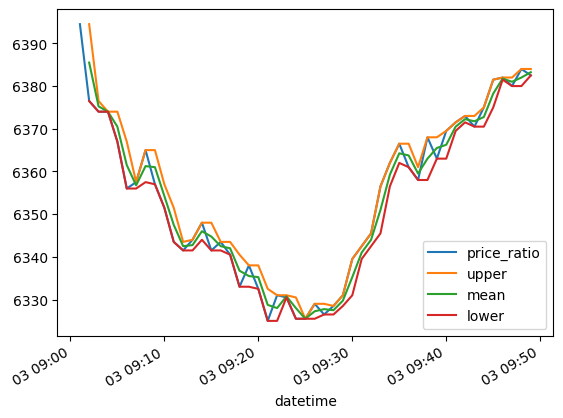

In [23]:
df.set_index('datetime').drop(['latency','count'],axis=1).plot()

In [26]:
m_df = ss.run("barM")
y_df = ss.run("barY")

In [30]:
(y_df['close'] - m_df['close']).head(10)

0    4907.0
1    4895.0
2    4880.0
3    4888.0
4    4870.0
5    4836.0
6    4841.0
7    4850.0
8    4834.0
9    4833.0
Name: close, dtype: float64

In [32]:
(y_df['close'] - m_df['close']).rolling(3).mean().head(10)

0            NaN
1            NaN
2    4894.000000
3    4887.666667
4    4879.333333
5    4864.666667
6    4849.000000
7    4842.333333
8    4841.666667
9    4839.000000
Name: close, dtype: float64